# Projeto 1 - Ciência dos Dados

# Objetivo do projeto


"Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um
determinado produto no Twitter. A empresa deseja que você: crie um programa que selecione
algumas mensagens disponíveis no Twitter, as quais mencionam esse particular produto; e
classifique esses tweets como "relevante" ou "irrelevante", pelo menos.
Com isso, essa empresa deseja que mensagens relevantes, que denigrem o nome do produto, ou
que mereçam destaque, por exemplo, disparem um foco de atenção da área de marketing.
Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamente do
Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails, por exemplo.
Esse classificador permite calcular qual a probabilidade de uma mensagem ser relevante dada as
palavras em seu conteúdo.

Para realizar o MVP (minimum viable product) do projeto, você precisa implementar uma versão
do classificador que "aprende" o que é relevante com uma base de treinamento e compara a
performance dos resultados com uma base de testes.

Após validado, o seu protótipo poderia, porque não, também capturar e classificar
automaticamente as mensagens da plataforma"

# Contribuidores: 

Layne Pereira da Silva

Lidia Alves Chagas Domingos

# Carregando bibliotecas utilizadas:

In [595]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import nltk 
from nltk.stem import RSLPStemmer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

pd.options.mode.chained_assignment = None  # default='warn'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lidia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Diretório utilizado:

In [596]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\lidia\Desktop\Ciência dos Dados\Projeto1\PROJETO-1-CDADOS


## Carregando a base de dados e visualizando 5 primeiros termos:


In [597]:
#Abrindo excel:
filename = 'XIAOMI.xlsx'

In [598]:
#Armazenando excel dos dados de TREINAMENTO em uma variável e visualizando 5 primeiros termos:
train = pd.read_excel(filename)
train.head(5)

,TREINAMENTO,CLASSIFICAÇÃO
0,quem aqui tb pronuncia xiaomi xaiomi,0
1,xiaomi mi true airdots 2s earphone(aliexpress)...,0
2,@felpsflip carreguei meu xiaomi uma vez na vid...,1
3,"#promo #\n$133.99 ~ 111,85 € ✂️cupão/cupom/cup...",0
4,"#promo #\n$299.99 ~ 250,41 € ✂️cupão/cupom/cup...",0


In [599]:
#Armazenando excel dos dados de TESTE em uma variável e visualizando 5 primeiros termos:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,CLASSIFICAÇÃO
0,"#promo #\n$11.99 ~ 10,01 € ✂️cupão/cupom/cupon...",0
1,"💠xiaomi poco m3 \n\n💵 por: r$ 728,27 64gb\n💵 ...",0
2,"@_faccin_ ""quem ai tem um xiaomi pra ligar o p...",0
3,comprei mais capinha pro xiaomi https://t.co/7...,0
4,#promoção #oferta \n\n💵 por: r$ 1420 \n🛒 link:...,0


In [600]:
#Selecionando linhas dos dados TESTE pelo método de seleção ILOC:
test.iloc[:,0:1]

,Teste
0,"#promo #\n$11.99 ~ 10,01 € ✂️cupão/cupom/cupon..."
1,"💠xiaomi poco m3 \n\n💵 por: r$ 728,27 64gb\n💵 ..."
2,"@_faccin_ ""quem ai tem um xiaomi pra ligar o p..."
3,comprei mais capinha pro xiaomi https://t.co/7...
4,#promoção #oferta \n\n💵 por: r$ 1420 \n🛒 link:...
...,...
254,"rt @victorxama: salve rapa, tô vendendo meu xi..."
255,@mslaryhill tenho um haylou gt1 pro q é da mes...
256,@gabiiii__araujo 😱😱😱\n\n*baixou mais!!*\n\n*xi...
257,@inutializador @viniport0 @2kjuramento @pessoa...


## Descrição do produto escolhido
    
   A empresa escolhida foi a Xiaomi, "uma empresa multinacional chinesa do ramo da tecnologia e manufatura de produtos eletrônicos com sede em Pequim. A Xiaomi desenvolve, investe, produz e distribui smartphones, notebooks, smartbands, fones de ouvido, televisões, dispositivos para casas inteligentes, e muitos outros produtos."
    
    Fonte: https://pt.wikipedia.org/wiki/Xiaomi
   

## Critérios de classificação dos tweets:
   Escolhida a empresa e seus produtos, classificamos como tweets relevantes toda e qualquer citação, positiva ou negativa, referente às citações dos internautas acerca do produto. Tweets considerados como "irrelevantes" foram denominados como tweets não relacionados diretamente ao produto. Além disso, os tweets considerados relevantes expressavam algum sentimento em relação aos produtos da empresa, seja de felicidade, ansiedade acerca da compra, tristeza, decepção, entre outros.

___
# Montando um Classificador Naive-Bayes

O algoritmo “Naive Bayes” é um classificador probabilístico muito utilizado em machine learning. Baseado no “Teorema de Bayes”, o modelo foi criado por um matemático inglês, e também ministro presibiteriano, chamado Thomas Bayes (1701 – 1761) para tentar provar a existência de Deus.

Hoje é também utilizado na área de Aprendizado de Máquina (Machine Learning) para categorizar textos com base na frequência das palavras usadas.

Entre as possibilidades de aplicações está a classificação de um e-mail como SPAM ou Não-SPAM e a identificação de um assunto com base em seu conteúdo.

Ele recebe o nome de “naive” (ingênuo) porque desconsidera a correlação entre as variáveis (features). Ou seja, se determinada fruta é rotulada como “Limão”, caso ela também seja descrita como “Verde” e “Redonda”, o algoritmo não vai levar em consideração a correlação entre esses fatores. Isso porque trata cada um de forma independente.

Fonte: https://www.datageeks.com.br/naive-bayes/

**EVENTOS**

 * $R$: tweets relevantes
 * $R^c$: tweets irrelevantes
 * $C$: tweet recebido

**PROBABILIDADES**

 * $P(R)$ : probabilidade de um tweet ser relevante ;
 * $P(R^c)$: probabilidade de um tweet não ser relevante, ou seja, irrelevante ;
 * $P(C)$ : probabilidade de cada tweet ocorrer na língua portuguesa ;
 * $P(C|R)$ : probabilidade do tweet existir dado o conjunto de tweets relevantes ;
 * $P(C|R^c)$: probabilidade do tweet existir dado o conjunto de tweets irrelevantes ; 
 * $P(R|C)$: probabilidade do tweet ser relevante dado a frase ;
 * $P(R^c|C)$: probabilidade do tweet ser irrelevante dado a frase;



$$P(R|C) = \frac{P(C|R) \cdot P(R)}{P(C)}$$



### Funções criadas:

In [601]:
#Importando novas bibliotecas importantes para construção das funções:
import re 
from nltk.tokenize.casual import TweetTokenizer #separa os emojis como palavras.

#Limpeza de mensagens removendo os caracteres: enter, :, ", ', (, ), etc sem remoção de emojis + outras propostas de limpezas:
def cleanup(text):
    #import string
    punctuation = '[!-@.~[\]:"''?;\),("/]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    text_subbed = re.sub(r'http\S+', '',text_subbed)
    t = TweetTokenizer()
    text_subbed = t.tokenize(text_subbed) 
    return text_subbed

#Correção de espaços entre palavras e/ou emojis.
def RemoveStopWords(list_of_words):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    lista_filtrada = []
    for word in list_of_words:
        if word not in stopwords:
            lista_filtrada.append(word)
    return lista_filtrada

#Prever classe do conjunto, resolver problema de frequência zero
def Suavizacao_Laplace(variavel1, variavel2, variavel3):
    y = (1 + variavel1)/(variavel2 + len(variavel3))  
    return y

#Multiplicando valores de listas
def MultiplyList(List) : 
    result = 1
    for x in List: 
         result = result * x  
    return result


## Criando variáveis com palavras juntadas e as limpando:

In [602]:
#JUNTANDO TODAS AS PALAVRAS DOS TWEETS RELEVANTES DO TREINAMENTO
train_relevante = train.loc[train["CLASSIFICAÇÃO"] == 1, :]
train_relevante_filtrada = ' '.join(train_relevante.TREINAMENTO) 

#JUNTANDO TODAS AS PALAVRAS DOS TWEETS IRRELEVANTES DO TREINAMENTO
train_irrelevante = train.loc[train["CLASSIFICAÇÃO"] == 0, :]
train_irrelevante_filtrada = ' '.join(train_irrelevante.TREINAMENTO) 


In [603]:
#LIMPANDO VARIÁVEIS CRIADAS, COLOCANDO EM MINÚSCULO E AS GUARDANDO
relevante = cleanup(train_relevante_filtrada.lower())
palavras_relevantes = RemoveStopWords(relevante)

irrelevante = cleanup(train_irrelevante_filtrada.lower())
palavras_irrelevantes = RemoveStopWords(irrelevante)

#JUNTANDO OS CONJUNTOS
palavras_total = palavras_relevantes + palavras_irrelevantes


In [604]:
#TRANSFORMANDO EM PD.SERIES
series_total = pd.Series(palavras_total)
series_train_relevante = pd.Series(palavras_relevantes)
series_train_irrelevante = pd.Series(palavras_irrelevantes)


## Fazendo cálculo de frequências:


In [605]:
#FREQUÊNCIAS RELATIVAS

palavras_total_relativas = series_total.value_counts(True)
palavras_relevante_relativas = series_train_relevante.value_counts(True)
palavras_irrelevante_relativas = series_train_irrelevante.value_counts(True)

In [606]:
#FREQUÊNCIAS ABSOLUTAS

palavras_relevante_absolutas = series_train_relevante.value_counts()
palavras_irrelevante_absolutas = series_train_irrelevante.value_counts()
palavras_total_absolutas = series_total.value_counts()


# Atribuindo função ao classificador

In [607]:
def funcao_classificadora(test):
    
    lista_resultados = []
    
    test['Classificação_NB'] = 'NaN'
    
    for tweet in list(test.iloc[:,0]):
        
        tweet_limpo = RemoveStopWords(cleanup(tweet.lower()))
        lista_de_probabilidades1 = []
        lista_de_probabilidades2 = []
        
        for palavra in tweet_limpo:
            
            if (palavra in palavras_relevante_absolutas) & (palavra not in palavras_irrelevante_absolutas):
                Laplace = Suavizacao_Laplace(palavras_relevante_absolutas[palavra],palavras_relevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades1.append(Laplace)
                Laplace = Suavizacao_Laplace(0,palavras_irrelevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades2.append(Laplace)
                
            elif (palavra not in palavras_relevante_absolutas) & (palavra in palavras_irrelevante_absolutas):
                Laplace = Suavizacao_Laplace(palavras_irrelevante_absolutas[palavra],palavras_irrelevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades2.append(Laplace)
                Laplace = Suavizacao_Laplace(0,palavras_relevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades1.append(Laplace)
                
            elif (palavra in palavras_relevante_absolutas) & (palavra in palavras_irrelevante_absolutas):
                Laplace = Suavizacao_Laplace(palavras_relevante_absolutas[palavra],palavras_relevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades1.append(Laplace)
                Laplace = Suavizacao_Laplace(palavras_irrelevante_absolutas[palavra],palavras_irrelevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades2.append(Laplace)
            
            elif palavra == 'xiaomi':
                continue
                
            else:
                Laplace = Suavizacao_Laplace(0,palavras_relevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades1.append(Laplace)
                Laplace = Suavizacao_Laplace(0,palavras_irrelevante_absolutas.sum(),palavras_total_absolutas)
                lista_de_probabilidades2.append(Laplace)
                
            P_C_dado_R = MultiplyList(lista_de_probabilidades1)
            P_C_dado_Rc = MultiplyList(lista_de_probabilidades2)

        P_R = (palavras_relevante_absolutas.sum())/(palavras_total_absolutas.sum())
    
        P_Rc = 1 - P_R
        
        P_R_dado_C = P_R * P_C_dado_R

        P_Rc_dado_C = P_Rc * P_C_dado_Rc            
        
        if P_R_dado_C > P_Rc_dado_C:
            resultado = 1
        else:
            resultado = 0
        
        lista_resultados.append(resultado)
    test['Classificação_NB'] = lista_resultados
    return test
    

___
# Verificando a performance do classificador e resultados:



In [609]:
teste = funcao_classificadora(test)
teste

,Teste,CLASSIFICAÇÃO,Classificação_NB
0,"#promo #\n$11.99 ~ 10,01 € ✂️cupão/cupom/cupon...",0,0
1,"💠xiaomi poco m3 \n\n💵 por: r$ 728,27 64gb\n💵 ...",0,0
2,"@_faccin_ ""quem ai tem um xiaomi pra ligar o p...",0,1
3,comprei mais capinha pro xiaomi https://t.co/7...,0,0
4,#promoção #oferta \n\n💵 por: r$ 1420 \n🛒 link:...,0,0
...,...,...,...
254,"rt @victorxama: salve rapa, tô vendendo meu xi...",0,0
255,@mslaryhill tenho um haylou gt1 pro q é da mes...,1,1
256,@gabiiii__araujo 😱😱😱\n\n*baixou mais!!*\n\n*xi...,0,0
257,@inutializador @viniport0 @2kjuramento @pessoa...,1,1


In [610]:
#Definindo variáveis da planilha como variáveis categóricas e suas respectivas categorias 
teste['CLASSIFICAÇÃO'] = teste['CLASSIFICAÇÃO'].astype('category')
teste['CLASSIFICAÇÃO'].cat.categories = ['Irrelevante', 'Relevante']
teste['CLASSIFICAÇÃO'].cat.categories

Index(['Irrelevante', 'Relevante'], dtype='object')

In [611]:
#Definindo variáveis do classificador como variáveis categóricas e suas respectivas categorias 
teste['Classificação_NB'] = teste['Classificação_NB'].astype('category')
teste['Classificação_NB'].cat.categories = ['Irrelevante', 'Relevante']
teste['Classificação_NB'].cat.categories

Index(['Irrelevante', 'Relevante'], dtype='object')

### Comparando resultados

In [612]:
#Comparando resultados das classicação entre o planilha e o classificador Naive Bayes por meio do comando CrossTab

tabela = pd.crosstab(teste.Classificação_NB, teste.CLASSIFICAÇÃO, normalize = True).round(4)
tabela

CLASSIFICAÇÃO,Irrelevante,Relevante
Classificação_NB,,
Irrelevante,0.3089,0.0656
Relevante,0.1660,0.4595


### Extraindo contagens:

In [613]:
verdadeiros_positivos = tabela.iloc[1,1]*100
falsos_positivos = tabela.iloc[1,0]*100
verdadeiros_negativos = tabela.iloc[0,0]*100
falsos_negativos = tabela.iloc[0,1]*100

#calculando eficácia:
eficacia = verdadeiros_positivos + verdadeiros_negativos
eficacia

print('A porcentagem de verdadeiros positivos é: {:.2f}%\n'.format(verdadeiros_positivos))
print('A porcentagem de falsos positivos é: {:.2f}%\n'.format(falsos_positivos))
print('A porcentagem de verdadeiros negativos é: {:.2f}%\n'.format(verdadeiros_negativos))
print('A porcentagem de falsos negativos é: {:.2f}%\n'.format(falsos_negativos))
print('Portanto, a eficácia do classificador é de: {:.2f}%\n'.format(eficacia))


A porcentagem de verdadeiros positivos é: 45.95%

A porcentagem de falsos positivos é: 16.60%

A porcentagem de verdadeiros negativos é: 30.89%

A porcentagem de falsos negativos é: 6.56%

Portanto, a eficácia do classificador é de: 76.84%



___
# Conclusão


- ## Comparativos qualitativos:
 
   Dada a junção das porcentagens de verdadeiros positivos e verdadeiros negativos, foi possível perceber que a eficácia do classificador foi de 76,84%. Isso evidência que de um total de 100%, apenas existiria aproximadamente 23,16% de "falha" do classificador, classificando o classificador como bom. Apesar de terem que ser realizadas muitas melhorias, a porcentagem de verdadeiros positivos em comparação com verdadeiros negativos e a porcentagem de falsos positivos em comparação a falsos negativos, em ambos os casos, se sobressaem, reafirmando a classificação designada ao Bayes.
    Acerca das mensagens tratadas com dupla negação e sacarmo, estas não foram interpretadas pelo classificador, uma vez que a parte ingênua do Naive Bayes consiste em assumir que as palavras são independentes entre si e que sua ordem na frase não importa, assim ignorando esse tratamento.
 
    - ### Por qual motivo a base de treinamento não pode ser alimentada automaticamente pelo próprio classificador?
        Por conta da ingenuidade do classificador ao assumir que as palavras são independentes, torna-se inviável a classificação automáticada de tweets, uma vez que a classificação se tornaria largamente imprecisa. Nesse contexto, ao chegarem novos tweets para serem classificados na base de dados, não seria possível ter um resultado preciso se fosse classificado automaticamente, pois com uma amplitude maior por parte das classificações incorretas e, consequentemente, as probabilidades retornadas pelo modelo também estariam incorretas, tornando os resultados muito imprecisos.

    - ### Projeto de expansão e melhorias do classificador
        Dada a ingenuidade do classificador, seria interessante se fosse possível a troca do classificador por outro mais preciso (como citados nesse link (https://bitlybr.com/87Uwox). Ou até melhorar o Bayes em termos de precisão para ter resultados cada vez mais convincentes, mas para isso, uma das possibilidades seria a combinação com outros classificadores que objetificam a "dependência entre elementos", como explicado no artigo científico de Aloísio Carlos de Pina e Gerson Zaverucha realizado na Universidade Federal do Rio de Janeiro (UFRJ) (https://www.cos.ufrj.br/~ines/enia07_html/pdf/28095.pdf).
        Outra melhora a ser citada e um possível projeto expansão, seria primeiramente, dentro das citações acerca da empresa (grupo de relevantes) os classificar em novas categorias, como "Favoráveis" e "Desfavoráveis" por exemplo, voltado para algum produto específico dentro da empresa. Isso objetificaria ainda mais o resultado e tornaria algo bem mais específico. Além do que, trazer mais dados ao banco de dados também seria muito interessante do ponto de vista de resultado e precisão. Com isso, o motivo para ter uma continuidade de financiamento, seria as possibilidades que essas melhorias e expansões trariam. 


- ### Proposta do classificador em outros contextos

    Alguns contextos nos quais esse tipo de classificador poderia ser utilizado inicialmente seria como algoritmo para mapear a intenção de pesquisa de um determinado usuário, se baseando nas pesquisas feitas anteriormente. Outro possível utilização também seria no contexto econômico, no sentido de prever a situação financeira futura de uma empresa em um determinado ano, baseando-se nos dados obtidos em anos anteriormente. Dentre outras possíveis utilizações, a identificação de falhas em um determinado produto também seria viável, uma vez levado em conta a comparação entre a classificação manual dos funcionários e a classificação do Naive Bayes.

___
## Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste


### Juntando os dataframes para serem separados aleatoriamente depois:

In [614]:
# Criação de novos dataframes

novo_test = pd.read_excel(filename, sheet_name = 'Teste')
novo_test = novo_test.rename(columns={'Teste':'Todos'})

novo_train = pd.read_excel(filename, sheet_name = 'Treinamento')
novo_train = novo_train.rename(columns={'TREINAMENTO':'Todos'})

total = pd.concat([novo_test,novo_train])
dataframe_total = pd.DataFrame(total)
dataframe_total

,Todos,CLASSIFICAÇÃO
0,"#promo #\n$11.99 ~ 10,01 € ✂️cupão/cupom/cupon...",0
1,"💠xiaomi poco m3 \n\n💵 por: r$ 728,27 64gb\n💵 ...",0
2,"@_faccin_ ""quem ai tem um xiaomi pra ligar o p...",0
3,comprei mais capinha pro xiaomi https://t.co/7...,0
4,#promoção #oferta \n\n💵 por: r$ 1420 \n🛒 link:...,0
...,...,...
295,vivendo e aprendendo e amando a xiaomi cada ve...,1
296,@cocadws cê usa xiaomi?,0
297,xiaomi lança novos wallpapers com obras holand...,0
298,@tec_mundo alô @xiaomibrasil @xiaomi queremos...,0


### Classificando 100 vezes trocando as bases de dados:

In [615]:
lista_eficacia = []

for i in range(100):
    train2, test2 = train_test_split(total, test_size=259)
    
    train_relevante2 = train2.loc[train2["CLASSIFICAÇÃO"] == 1, :]
    train_relevante_filtrada2 = ' '.join(train_relevante2.Todos) 

    train_irrelevante2 = train2.loc[train2["CLASSIFICAÇÃO"] == 0, :]
    train_irrelevante_filtrada2 = ' '.join(train_irrelevante2.Todos) 

    relevante2 = cleanup(train_relevante_filtrada2.lower())
    palavras_relevantes2 = RemoveStopWords(relevante2)

    irrelevante2 = cleanup(train_irrelevante_filtrada2.lower())
    palavras_irrelevantes2 = RemoveStopWords(irrelevante2)

    series_train_relevante2 = pd.Series(palavras_relevantes2)
    series_train_irrelevante2 = pd.Series(palavras_irrelevantes2)

    palavras_relevante_relativas2 = series_train_relevante2.value_counts(True)
    palavras_irrelevante_relativas2 = series_train_irrelevante2.value_counts(True)

    palavras_relevante_absolutas2 = series_train_relevante2.value_counts()
    palavras_irrelevante_absolutas2 = series_train_irrelevante2.value_counts()

    def funcao_classificadora2(test):

        lista_resultados = []

        test['Classificação_NB'] = 'NaN'

        for tweet in list(test.iloc[:,0]):

            tweet_limpo = RemoveStopWords(cleanup(tweet.lower()))
            lista_de_probabilidades1 = []
            lista_de_probabilidades2 = []

            for palavra in tweet_limpo:

                if (palavra in palavras_relevante_absolutas2) & (palavra not in palavras_irrelevante_absolutas2):
                    Laplace = Suavizacao_Laplace(palavras_relevante_absolutas2[palavra],palavras_relevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades1.append(Laplace)
                    Laplace = Suavizacao_Laplace(0,palavras_irrelevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades2.append(Laplace)

                elif (palavra not in palavras_relevante_absolutas2) & (palavra in palavras_irrelevante_absolutas2):
                    Laplace = Suavizacao_Laplace(palavras_irrelevante_absolutas2[palavra],palavras_irrelevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades2.append(Laplace)
                    Laplace = Suavizacao_Laplace(0,palavras_relevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades1.append(Laplace)

                elif (palavra in palavras_relevante_absolutas2) & (palavra in palavras_irrelevante_absolutas2):
                    Laplace = Suavizacao_Laplace(palavras_relevante_absolutas2[palavra],palavras_relevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades1.append(Laplace)
                    Laplace = Suavizacao_Laplace(palavras_irrelevante_absolutas2[palavra],palavras_irrelevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades2.append(Laplace)

                elif palavra == 'xiaomi':
                    continue

                else:
                    Laplace = Suavizacao_Laplace(0,palavras_relevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades1.append(Laplace)
                    Laplace = Suavizacao_Laplace(0,palavras_irrelevante_absolutas2.sum(),palavras_total_absolutas)
                    lista_de_probabilidades2.append(Laplace)

                P_C_dado_R = MultiplyList(lista_de_probabilidades1)
                P_C_dado_Rc = MultiplyList(lista_de_probabilidades2)

            P_R = (palavras_relevante_absolutas2.sum())/(palavras_total_absolutas.sum())

            P_Rc = 1 - P_R

            P_R_dado_C = P_R * P_C_dado_R

            P_Rc_dado_C = P_Rc * P_C_dado_Rc            

            if P_R_dado_C > P_Rc_dado_C:
                resultado = 1
            else:
                resultado = 0

            lista_resultados.append(resultado)

        test['Classificação_NB'] = lista_resultados

        return test

    resultado2 = funcao_classificadora2(test2)

    tabela2 = pd.crosstab(resultado2.Classificação_NB, test2.CLASSIFICAÇÃO, normalize = True).round(4)

    verdadeiros_positivos2 = tabela2.iloc[1,1]*100
    verdadeiros_negativos2 = tabela2.iloc[0,0]*100

    eficacia2 = (verdadeiros_positivos2) +  (verdadeiros_negativos2)

    lista_eficacia.append(eficacia2.round(2))


### Medidas da eficácia:

In [616]:
lista_eficacia = pd.Series(lista_eficacia)
print(f'O mínimo da eficácia foi de {lista_eficacia.min():.2f} %')
print(f'O máximo da eficácia foi de {lista_eficacia.max():.2f} %')
print(f'A média da eficácia foi de {lista_eficacia.mean():.2f} %')


O mínimo da eficácia foi de 67.57 %
O máximo da eficácia foi de 81.85 %
A média da eficácia foi de 74.50 %


___
### Histograma da eficácia:

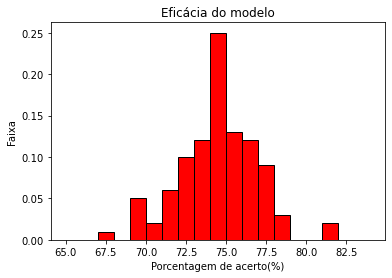

In [617]:
# faixas de AMPLITUDES IGUAIS
faixa1 = np.arange(65,85,1)
faixa1

# Histograma 
plt.hist(lista_eficacia, bins=faixa1, edgecolor='black', color = 'red', density = True)
plt.title('Eficácia do modelo')
plt.ylabel('Faixa')
plt.xlabel('Porcentagem de acerto(%)')
plt.show()


- ## Conclusões sobre o gráfico:
 
   Observando o histograma, é possível perceber uma certa variância nos valores de eficácia produzidos pelo classificador. Dessa forma, ocorre uma variância em torno de 10% do valor mínimo para o valor máximo. Uma vantagem que pode ser observada é que só tem um certo potencial de erro se for feito somente uma vez essa mudança na base de treinamento. Mudando sempre o dataframe de treinamento poderia gerar uma propagação de erros de uma separação para outro, o que pode ser observado visualmente no gráfico na diferença de densidade de uma faixa para outro. Além disso, tendo somente uma base fixa de treinamento faz com que as probabilidades de teste sejam calculadas por um mesmo padrão sempre, não ocorrendo tanta propagação de erro.

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://pt.wikipedia.org/wiki/Xiaomi

https://www.datageeks.com.br/naive-bayes/

https://www.cos.ufrj.br/~ines/enia07_html/pdf/28095.pdf

https://bitlybr.com/87Uwox

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
